In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Importing the data

In [2]:
df = pd.read_csv('data.csv')

The dataframe

In [3]:
df

,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities
0,Microsoft,2024,245122.0,88136.0,512163.0,243686.0,118548.0
1,Microsoft,2023,211915.0,72361.0,411976.0,205753.0,87582.0
2,Microsoft,2022,198270.0,72738.0,364840.0,198298.0,89035.0
3,Tesla,2025,97690.0,7153.0,122070.0,48390.0,14923.0
4,Tesla,2024,96773.0,14974.0,106618.0,43009.0,13256.0
5,Tesla,2023,81462.0,12587.0,82338.0,36440.0,14724.0
6,Apple,2024,391035.0,98016.0,364980.0,308030.0,118254.0
7,Apple,2023,383285.0,96652.0,352583.0,290437.0,110543.0
8,Apple,2022,394328.0,88531.0,352755.0,302083.0,122151.0


Stats

In [4]:
df.describe()

,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2023.333333,233320.000000,61238.666667,296702.555556,186236.222222,76557.333333
std,1.000000,130006.968331,38346.477641,153240.424606,114506.220759,48272.769855
min,2022.000000,81462.000000,7153.000000,82338.000000,36440.000000,13256.000000
25%,2023.000000,97690.000000,14974.000000,122070.000000,48390.000000,14923.000000
50%,2023.000000,211915.000000,72738.000000,352755.000000,205753.000000,89035.000000
75%,2024.000000,383285.000000,88531.000000,364980.000000,290437.000000,118254.000000
max,2025.000000,394328.000000,98016.000000,512163.000000,308030.000000,122151.000000


Clean and convert 'Total Revenue' and 'Net Income'

In [5]:
df['Total Revenue'] = df['Total Revenue'].astype(str).str.replace(',', '').str.replace('$', '').str.strip()
df['Net Income'] = df['Net Income'].astype(str).str.replace(',', '').str.replace('$', '').str.strip()

Now convert to numeric

In [6]:
df['Total Revenue'] = pd.to_numeric(df['Total Revenue'], errors='coerce')
df['Net Income'] = pd.to_numeric(df['Net Income'], errors='coerce')

Now calculate percentage change

In [7]:
df['Revenue Growth (%)'] = df.groupby('Company')['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income'].pct_change() * 100

Average Financial Metrics by Company

In [8]:
df.groupby('Company')[['Total Revenue', 'Net Income', 'Revenue Growth (%)', 'Net Income Growth (%)']].mean()

,Total Revenue,Net Income,Revenue Growth (%),Net Income Growth (%)
Company,,,,
Apple,389549.333333,94399.666667,0.449613,-4.896959
Microsoft,218435.666667,77745.000000,-9.993017,-8.688738
Tesla,91975.000000,11571.333333,-8.380123,46.698887


In [9]:
df.columns

Index(['Company', 'Year', 'Total Revenue', 'Net Income', 'Total Assets',
       'Total Liabilities', 'Cash Flow from Operating Activities',
       'Revenue Growth (%)', 'Net Income Growth (%)'],
      dtype='object')

In [10]:
# Function to plot a single metric

In [11]:
def plot_metric(metric):
    plt.figure(figsize=(8, 5))
    for company in df['Company'].unique():
        sub_df = df[df['Company'] == company].sort_values('Year')
        plt.plot(sub_df['Year'], sub_df[metric], marker='o', label=company)
    plt.title(f'{metric} Over Years')
    plt.xlabel('Year')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

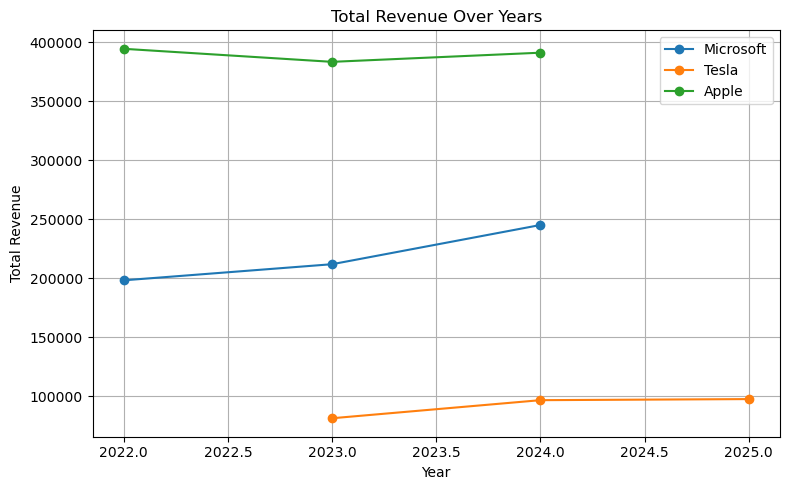

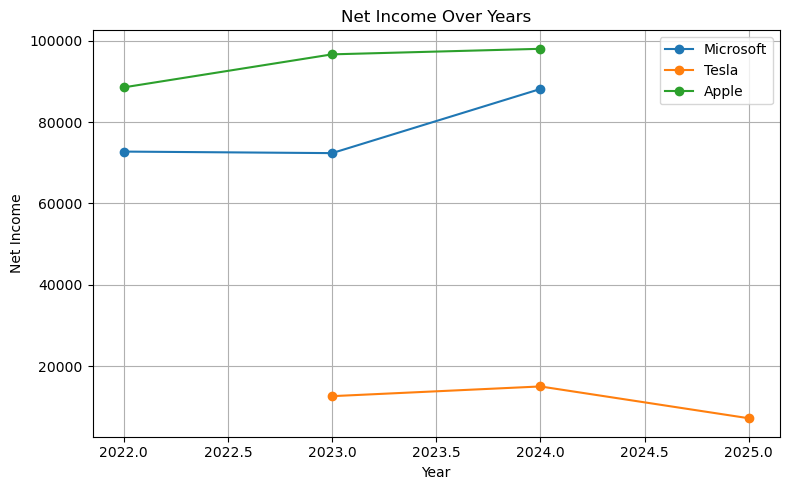

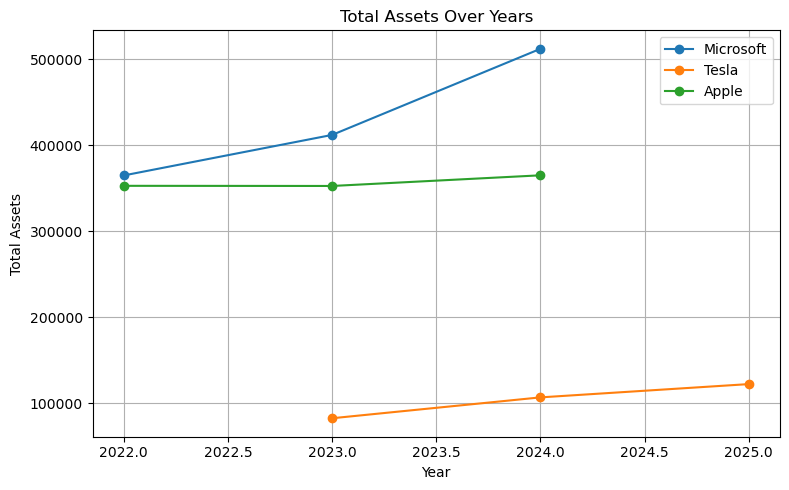

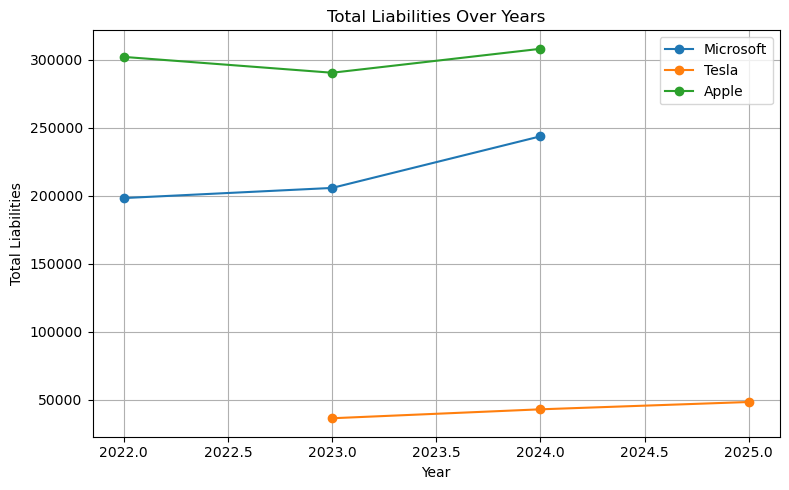

In [12]:
# Plot each financial metric
for metric in ['Total Revenue', 'Net Income', 'Total Assets', 'Total Liabilities']:
    plot_metric(metric)

Year-over-Year Cash Flow Trend

In [13]:
df['Cash Flow from Operating Activities'] = pd.to_numeric(df['Cash Flow from Operating Activities'].astype(str).str.replace(',', ''), errors='coerce')

Plot for Cash Flow from Operating Activities over the years

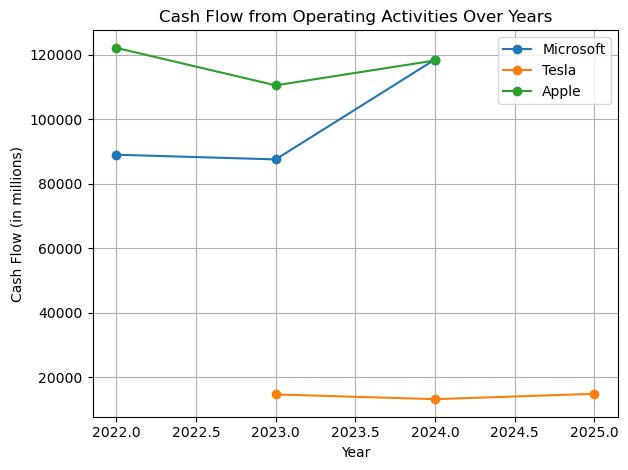

In [14]:
fig, ax = plt.subplots()
for company in df['Company'].unique():
    sub_df = df[df['Company'] == company].sort_values('Year')
    ax.plot(sub_df['Year'], sub_df['Cash Flow from Operating Activities'], marker='o', label=company)

ax.set_title('Cash Flow from Operating Activities Over Years')
ax.set_xlabel('Year')
ax.set_ylabel('Cash Flow (in millions)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

Plot for revenue growth

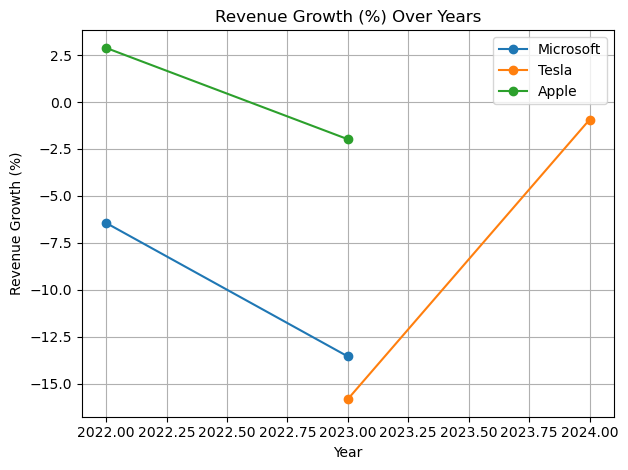

In [15]:
fig, ax = plt.subplots()
for company in df['Company'].unique():
    sub_df = df[df['Company'] == company].sort_values('Year')
    ax.plot(sub_df['Year'], sub_df['Revenue Growth (%)'], marker='o', label=company)

ax.set_title('Revenue Growth (%) Over Years')
ax.set_xlabel('Year')
ax.set_ylabel('Revenue Growth (%)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

Plot for Income growth

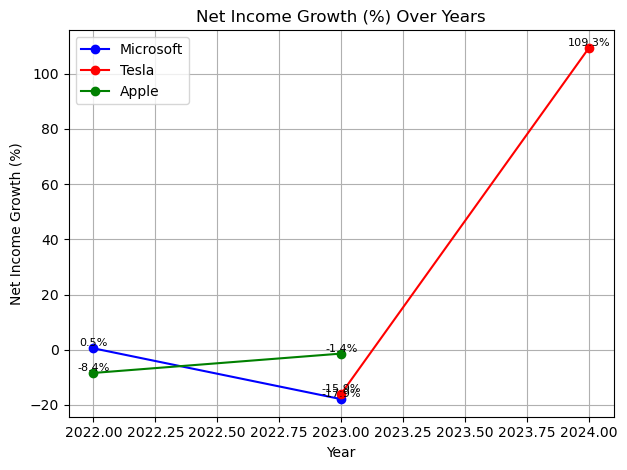

In [16]:
fig, ax = plt.subplots()
colors = {'Microsoft': 'blue', 'Tesla': 'red', 'Apple': 'green'}

for company in df['Company'].unique():
    sub_df = df[df['Company'] == company].sort_values('Year')
    ax.plot(sub_df['Year'], sub_df['Net Income Growth (%)'],
            marker='o', label=company, color=colors[company])

    # Add data labels
    for x, y in zip(sub_df['Year'], sub_df['Net Income Growth (%)']):
        if pd.notna(y):
            ax.text(x, y, f"{y:.1f}%", ha='center', va='bottom', fontsize=8)

# Formatting
ax.set_title('Net Income Growth (%) Over Years')
ax.set_xlabel('Year')
ax.set_ylabel('Net Income Growth (%)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

# Conclusion and Insights